In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"
normalized_file = Path(data_root, 'data/processed/facial-1001-normalized.pkl')

In [4]:
data = load_data(normalized_file)

In [5]:
len(data)

300

In [6]:
data[0]['features'].shape

(3676, 323)

In [7]:
data[0]


{'user_id': -1.647508942095828,
 'test_condition': 0.4629100498862757,
 'delay': 1.0690449676496976,
 'jitter': 1.224744871391589,
 'packet_loss_rate': 0.0,
 'features': array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [-0.020206,  0.302458, -0.952948, ...,  0.      ,  0.      ,
          0.      ],
        [-0.015582,  0.300056, -0.953794, ...,  0.      ,  0.      ,
          0.      ],
        [-0.021239,  0.304443, -0.952294, ...,  1.      ,  0.      ,
          0.      ]])}

In [36]:
X_full = np.concatenate([d['features'] for d in data], axis=0)

In [38]:
X_full.shape

(1049842, 323)

In [10]:
data[0]

{'user_id': -1.647508942095828,
 'test_condition': 0.4629100498862757,
 'delay': 1.0690449676496976,
 'jitter': 1.224744871391589,
 'packet_loss_rate': 0.0,
 'features': array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [-0.020206,  0.302458, -0.952948, ...,  0.      ,  0.      ,
          0.      ],
        [-0.015582,  0.300056, -0.953794, ...,  0.      ,  0.      ,
          0.      ],
        [-0.021239,  0.304443, -0.952294, ...,  1.      ,  0.      ,
          0.      ]])}

In [43]:
Y_full = [np.tile(
        np.array([[d['delay'], d['jitter'], d['packet_loss_rate'], d['test_condition'],d['user_id']]]),
        (d['features'].shape[0], 1)
      ) for d in data]

In [44]:
Y_full = np.concatenate(Y_full, axis=0)

In [45]:
Y_full.shape

(1049842, 5)

In [46]:
X_full.shape, Y_full.shape

((1049842, 323), (1049842, 5))

In [54]:
n_sample = 10*10000
indices = np.random.choice(X_full.shape[0], size=n_sample, replace=False)

In [55]:
indices[:10]

array([811168, 360616, 380060, 357619, 179227, 503598, 716341, 992563,
       892714, 346960])

In [56]:
X = X_full[indices]
Y = Y_full[indices]

In [57]:
X[0:10]

array([[ 0.109126,  0.216369, -0.970194, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.208627,  0.060681, -0.976111, ...,  1.      ,  0.      ,
         0.      ],
       [-0.093126,  0.095048, -0.991107, ...,  0.      ,  0.      ,
         1.      ],
       ...,
       [ 0.15388 ,  0.171892, -0.973023, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.039525, -0.00744 , -0.999191, ...,  0.      ,  0.      ,
         1.      ],
       [ 0.02465 , -0.059372, -0.997932, ...,  0.      ,  0.      ,
         0.      ]])

In [116]:
Y[0:10]

array([[1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5]])

In [58]:
import numpy as np
import tensorflow as tf


In [59]:
from sklearn.model_selection import train_test_split


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [61]:
# Assuming X and Y are already defined as numpy arrays
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
model = Sequential([
    Dense(128, input_shape=(323,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout at 30%
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout at 20%
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),  # Dropout at 10%
    Dense(5, activation='sigmoid')
])

C:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

In [64]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.0519 - mean_squared_error: 1.0519 - val_loss: 0.9804 - val_mean_squared_error: 0.9804
Epoch 2/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9570 - mean_squared_error: 0.9570 - val_loss: 0.9559 - val_mean_squared_error: 0.9559
Epoch 3/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9526 - mean_squared_error: 0.9526 - val_loss: 0.9527 - val_mean_squared_error: 0.9527
Epoch 4/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9486 - mean_squared_error: 0.9486 - val_loss: 0.9646 - val_mean_squared_error: 0.9646
Epoch 5/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9467 - mean_squared_error: 0.9467 - val_loss: 1.0005 - val_mean_squared_error: 1.0005
Epoch 6/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9480 - mean_squared_error: 0.9480 - val_loss: 1.0341 - val_mean_squared_error: 1.0341
Epoch 7/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9428 - mean_squared_error: 0.9428 - 

In [66]:
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE: {test_mse}")

Test MSE: 1.0267932415008545


In [67]:
predictions = model.predict(X_test[:10])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[6.1109298e-01 7.2177172e-01 1.7755105e-01 4.4027057e-01 9.9176800e-01]
 [6.2732078e-04 8.3206902e-04 4.0579896e-02 2.2322882e-02 9.9961609e-01]
 [2.0133981e-01 2.1393161e-01 1.2989552e-01 1.9725880e-01 3.7072715e-01]
 [1.9357247e-02 5.7998644e-03 2.0291605e-03 2.7324439e-03 2.0722383e-01]
 [9.4076961e-02 9.1776669e-02 6.3988537e-02 8.5483000e-02 8.3813828e-01]
 [2.8733622e-02 9.0718549e-03 8.8904267e-03 1.0449973e-02 9.9455267e-01]
 [7.5207930e-03 2.2429882e-03 1.0657000e-03 1.4778426e-03 1.2579770e-01]
 [2.1928260e-02 6.2850867e-03 7.3327748e-03 8.2656704e-03 9.6796393e-01]
 [1.0566427e-04 5.8886799e-04 1.7377781e-02 6.3560130e-03 9.9780273e-01]
 [8.9002732e-04 1.2175234e-03 2.5917081e-02 9.8821269e-03 3.9161733e-07]]


In [33]:
pip install matplotlib

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
import matplotlib.pyplot as plt

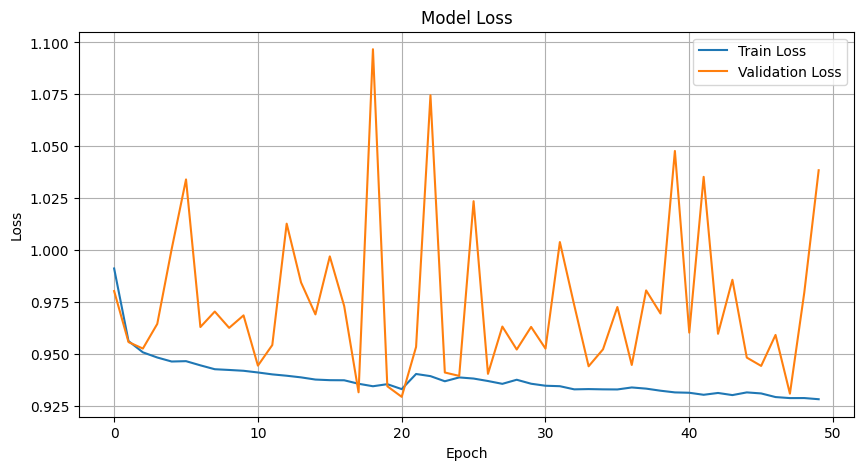

In [68]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

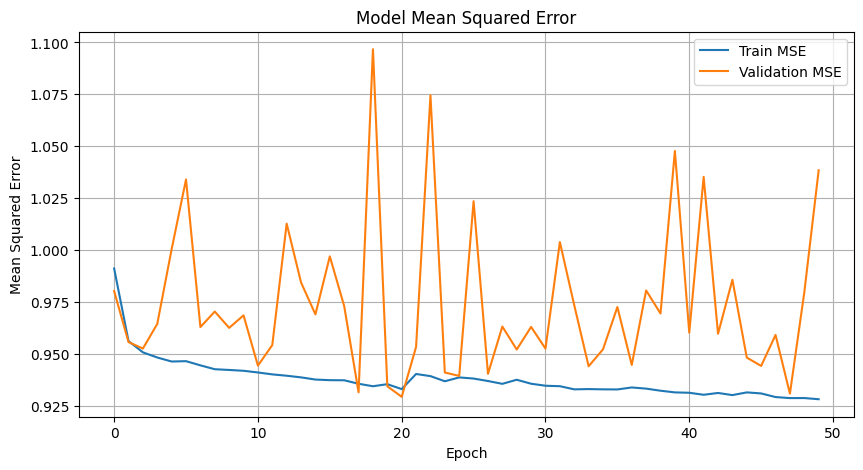

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Test MSE: 0.25869086384773254


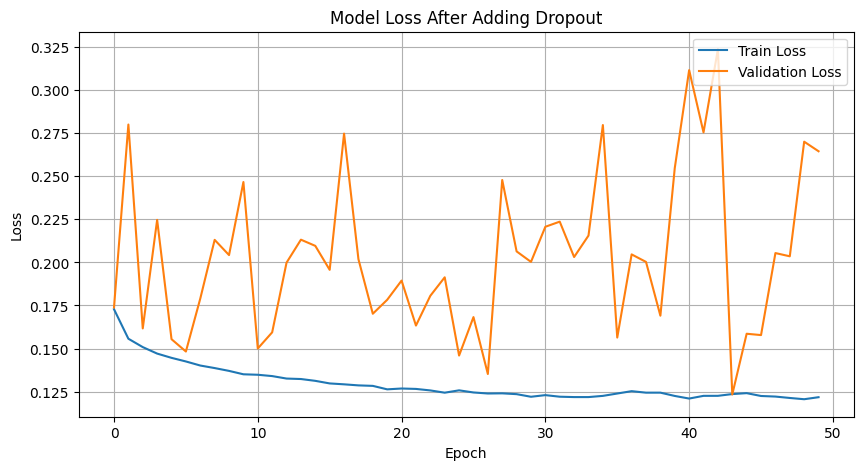

In [136]:
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE: {test_mse}")

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss After Adding Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()